<a href="https://colab.research.google.com/github/yehiayaser/General-Deep-learning-Models/blob/main/Flowers_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras

In [2]:
import os
import zipfile

file_path = '/content/archive.zip'

if not os.path.exists(file_path):
    print(f"Error: File not found at {file_path}")
else:
    try:
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall('/content/')
        print(f"Successfully unzipped {file_path} to /content/")
    except zipfile.BadZipFile:
        print(f"Error: {file_path} is not a valid zip file or is corrupted.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

Successfully unzipped /content/archive.zip to /content/


In [6]:
import os
import cv2
import numpy as np

# Define the base directory where the flower images are located
base_dir = '/content/flowers'

# List of the four flower types you want to load
flower_types = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'] # Assuming these are the directory names

data = []
labels = []

# Define the target image size (width, height)
img_width, img_height = 128, 128 # You can adjust these values

# Iterate through each flower type directory
for flower_type in flower_types:
    flower_dir = os.path.join(base_dir, flower_type)
    if os.path.isdir(flower_dir):
        # Iterate through each image file in the directory
        for img_file in os.listdir(flower_dir):
            img_path = os.path.join(flower_dir, img_file)
            # Read the image using OpenCV
            img = cv2.imread(img_path)
            if img is not None:
                # Resize the images to a consistent size
                img = cv2.resize(img, (img_width, img_height))
                data.append(img)
                labels.append(flower_type)
    else:
        print(f"Warning: Directory not found for flower type: {flower_type}")

# Convert the lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

print(f"Loaded {len(data)} images with labels.")
print(f"Labels: {np.unique(labels)}")

Loaded 4317 images with labels.
Labels: ['daisy' 'dandelion' 'rose' 'sunflower' 'tulip']


# Task
Unzip the file "flower_photos.tgz", load the image data for the four types of flowers, split the data into training and testing sets, apply a CNN model for deep learning, and evaluate the model's performance.

## Split data

### Subtask:
Split the image data and labels into training and testing sets.


**Reasoning**:
Split the data and labels into training and testing sets using train_test_split.



In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training data shape: (3453, 128, 128, 3)
Testing data shape: (864, 128, 128, 3)
Training labels shape: (3453,)
Testing labels shape: (864,)


## Preprocess labels

### Subtask:
Encode the string labels into numerical format, potentially using one-hot encoding for compatibility with the model's output layer.


**Reasoning**:
Encode the string labels into numerical format using LabelEncoder and then apply one-hot encoding using to_categorical.



In [8]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

print(f"Shape of one-hot encoded training labels: {y_train_one_hot.shape}")
print(f"Shape of one-hot encoded testing labels: {y_test_one_hot.shape}")

Shape of one-hot encoded training labels: (3453, 5)
Shape of one-hot encoded testing labels: (864, 5)


## Build cnn model

### Subtask:
Design and define the architecture of a Convolutional Neural Network (CNN) using Keras.


**Reasoning**:
Design and define the architecture of a Convolutional Neural Network (CNN) using Keras.



In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(len(np.unique(labels)), activation='softmax'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

## Compile the model

### Subtask:
Configure the CNN model for training by specifying the optimizer, loss function, and metrics.


**Reasoning**:
Compile the defined Keras model with the specified optimizer, loss function, and metrics.



In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

### Subtask:
Train the compiled CNN model using the training data.


**Reasoning**:
Train the compiled CNN model using the training data and labels, and store the training history.



In [11]:
history = model.fit(X_train, y_train_one_hot, epochs=10, validation_split=0.2)

Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.2407 - loss: 78.8487 - val_accuracy: 0.2200 - val_loss: 1.6101
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3167 - loss: 1.5169 - val_accuracy: 0.3025 - val_loss: 1.5934
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4016 - loss: 1.3813 - val_accuracy: 0.3097 - val_loss: 1.5826
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4939 - loss: 1.2415 - val_accuracy: 0.3430 - val_loss: 1.6965
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5976 - loss: 0.9911 - val_accuracy: 0.3343 - val_loss: 1.8387
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6916 - loss: 0.8236 - val_accuracy: 0.3473 - val_loss: 2.1601
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7626 - loss: 0.6343 - val_accuracy: 0.3589 - val_loss: 2.4529
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8139 - loss: 0.4816 - val_accuracy: 0.4081 -

## Evaluate the model

### Subtask:
Evaluate the performance of the trained model on the testing data.


**Reasoning**:
Evaluate the trained model on the testing data.



In [12]:
loss, accuracy = model.evaluate(X_test, y_test_one_hot)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4023 - loss: 2.9164
Test Loss: 3.0089941024780273
Test Accuracy: 0.40162035822868347


## Summary:

### Data Analysis Key Findings

*   The dataset was successfully split into training (3453 samples) and testing (864 samples) sets, with an 80/20 split respectively.
*   The string labels for the four flower types were successfully encoded into a numerical format using one-hot encoding, resulting in a vector of length 5 for each label.
*   A Sequential CNN model was built with three convolutional layers and max pooling, followed by two dense layers for classification. The final dense layer has 5 units with a 'softmax' activation, appropriate for a 5-class problem.
*   The model was compiled using the 'adam' optimizer and 'categorical\_crossentropy' loss function, with 'accuracy' as the metric.
*   The model was trained for 10 epochs, with training accuracy generally increasing and training loss decreasing. A 20% validation split was used during training.
*   The trained model achieved a test loss of approximately 3.009 and a test accuracy of approximately 0.402 on the testing data.

### Insights or Next Steps

*   The relatively low test accuracy (around 40.2%) suggests that the model's performance needs improvement. Further steps could involve increasing the number of training epochs, adjusting the model architecture, or applying data augmentation techniques.
*   Analyzing the training history (loss and accuracy on both training and validation sets) could provide insights into whether the model is overfitting or underfitting, guiding further model tuning efforts.


In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential([
    Input(shape=(img_width, img_height, 3)),  # Add an Input layer explicitly
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(np.unique(labels)), activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training data shape: (3453, 128, 128, 3)
Testing data shape: (864, 128, 128, 3)
Training labels shape: (3453,)
Testing labels shape: (864,)


In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train_one_hot, epochs=50, batch_size=100, validation_split=0.2)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 260ms/step - accuracy: 0.2291 - loss: 61.3316 - val_accuracy: 0.3575 - val_loss: 1.4582
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.4386 - loss: 1.3345 - val_accuracy: 0.3980 - val_loss: 1.3778
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.5738 - loss: 1.1080 - val_accuracy: 0.4399 - val_loss: 1.3199
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6680 - loss: 0.8666 - val_accuracy: 0.5181 - val_loss: 1.5243
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7908 - loss: 0.5891 - val_accuracy: 0.5137 - val_loss: 1.4335
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8844 - loss: 0.3911 - val_accuracy: 0.5181 - val_loss: 1.6463
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9441 - loss: 0.2201 - val_accuracy: 0.5036 - val_loss: 2.0479
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9666 - loss: 0.1369 - val_accuracy: 0.4949 

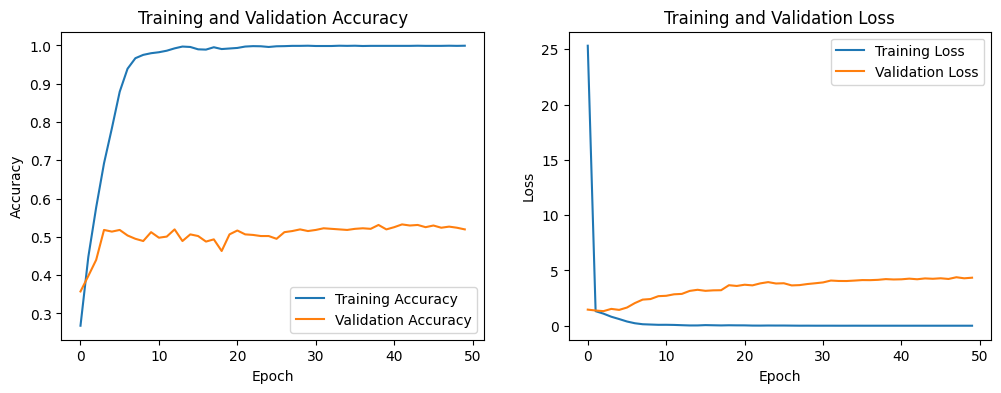

In [18]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [19]:
from sklearn.metrics import classification_report
import numpy as np

# Predict the classes for the test data
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Convert the one-hot encoded test labels back to original class labels
y_test_classes = np.argmax(y_test_one_hot, axis=1)

# Get the class names from the label encoder
class_names = label_encoder.classes_

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=class_names))

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Classification Report:
              precision    recall  f1-score   support

       daisy       0.44      0.40      0.42       162
   dandelion       0.56      0.58      0.57       223
        rose       0.46      0.43      0.44       155
   sunflower       0.64      0.64      0.64       135
       tulip       0.48      0.51      0.49       189

    accuracy                           0.51       864
   macro avg       0.51      0.51      0.51       864
weighted avg       0.51      0.51      0.51       864

